# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [37]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [38]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations

#### Question 2. Create a summary table.

In [39]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is a result of one test while GPA is a cumulative variable that includes grades for multiple courses. Compared to GRE, GPA's data is more closely distributed around the mean value.

#### Question 4. Drop data points with missing data.


In [16]:
#total count of NaN values
df_raw.isnull().sum().sum()

5

In [41]:
df_revised=df_raw.dropna()

In [42]:
df_revised

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: use df_revised.isnull().sum(). Now we have 397 rows and before that we had 400.

In [43]:
df_revised.isnull().sum().sum()

0

#### Question 6. Create box plots for GRE and GPA.

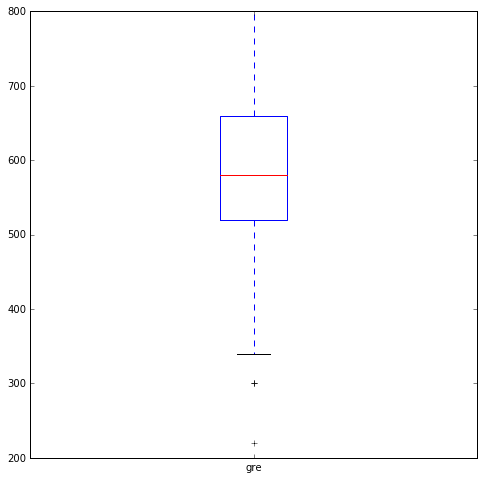

In [44]:
df_revised.gre.plot(kind = 'box', figsize = (8, 8))

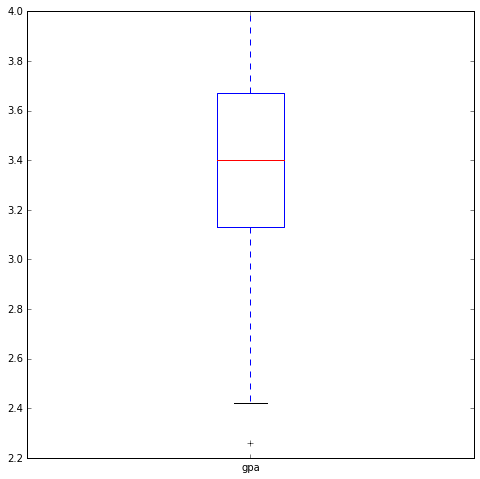

In [45]:
df_revised.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer: At least 75% of studensts have GPA of approximately 3.1 or higher and GRE of ~520 and higher OR
Half of Students have GPA above 3.4 and GRE above ~570. Both GRE and GPA have outliers with low values.

#### Question 8. Describe each distribution.

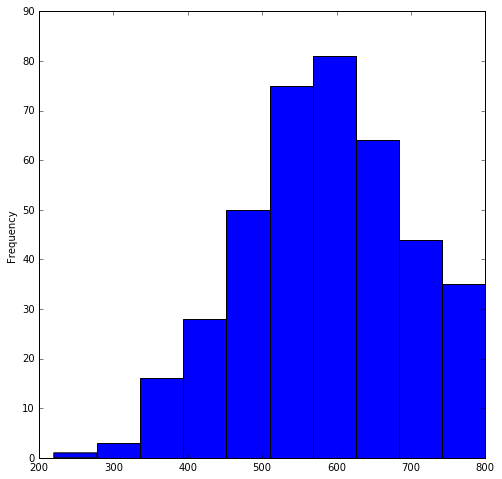

In [46]:
# plot the distribution of each variable
df_revised.gre.plot(kind = 'hist', figsize = (8, 8))

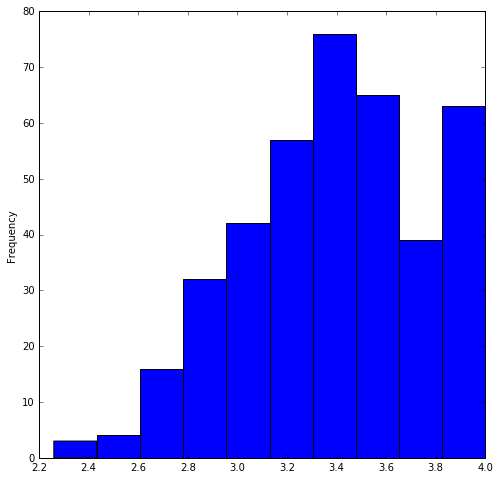

In [47]:
df_revised.gpa.plot(kind = 'hist', figsize = (8, 8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: Both GPA and GRE seem to be skewed to the left and hence they are not normally distributed.

*******************
Althouhg it looks like both for GRE and GPA  95% of total area is within 2 standard deviations of the mean:
GRE: mean +- 2std dev : (356.423368; 819.294516)
GPA: mean +- 2std dev : (2.631826; 4.152658)


In [52]:
df_revised.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Yes, we could eliminate skeweness from GRE and GPA by eliminating outliers.

#### Question 11. Which of our variables are potentially colinear?

In [48]:
# create a correlation matrix for the data
df_revised.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Positive medium correlation between GPA and GRE (0.38). 
Weak negative correlation between admission and prestige, and weak positive correlation between admission & GPA and  admission & GRE.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: build a regresssion where admission is a dependent variable and prestige is an independent variable and then figure out whether prestige coefficient (0.0963) is significant or not.
Prestige coefficient is significant as p-value=0.000 <0.0025 and Ho is rejected

In [50]:
X = df_revised[ ['prestige'] ]
y = df_revised['admit']

fit = sm.OLS(y, X).fit()

In [51]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 14 Mar 2016   Prob (F-statistic):           9.61e-22
Time:                        22:37:25   Log-Likelihood:                -289.44
No. Observations:                 397   AIC:                             580.9
Df Residuals:                     396   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prestige       0.0963      0.009     10.171      0.000         0.078     0.115
==============================================================================
Omnibus:                      584.865   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.026
Skew:                           0.747   Prob(JB):                     7.58e-15
Kurtosis:                       1.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 14. What is your hypothesis?

Answer: Ho: Prestige coefficient =0
        H1: prestige coeffient not equal to 0

## Bonus/Advanced

1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.